In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# US Immigration Statistics

## Overview
Let's take a quick look at what the data looks like:

In [3]:
df = pd.read_csv('./data/us-immigration-statistics.csv')
df.head()

,Year,Immigrants Obtaining Lawful Permanent Resident Status,Refugee Arrivals,Noncitizen Apprehensions,Noncitizen Removals,Noncitizen Returns
0,1980,"524,295","207,116","910,361","18,013","719,211"
1,1981,"595,014","159,252","975,780","17,379","823,875"
2,1982,"533,624","98,096","970,246","15,216","812,572"
3,1983,"550,052","61,218","1,251,357","19,211","931,600"
4,1984,"541,811","70,393","1,246,981","18,696","909,833"


## Data Cleaning
### Convert Non-Numeric Values to a Number

In [4]:
for col in df.columns[1:]:
    df[col] = df[col].apply(lambda x : x.replace(',', '')).astype(int)

In [5]:
df.head()

,Year,Immigrants Obtaining Lawful Permanent Resident Status,Refugee Arrivals,Noncitizen Apprehensions,Noncitizen Removals,Noncitizen Returns
0,1980,524295,207116,910361,18013,719211
1,1981,595014,159252,975780,17379,823875
2,1982,533624,98096,970246,15216,812572
3,1983,550052,61218,1251357,19211,931600
4,1984,541811,70393,1246981,18696,909833


## Explore the data with graphs

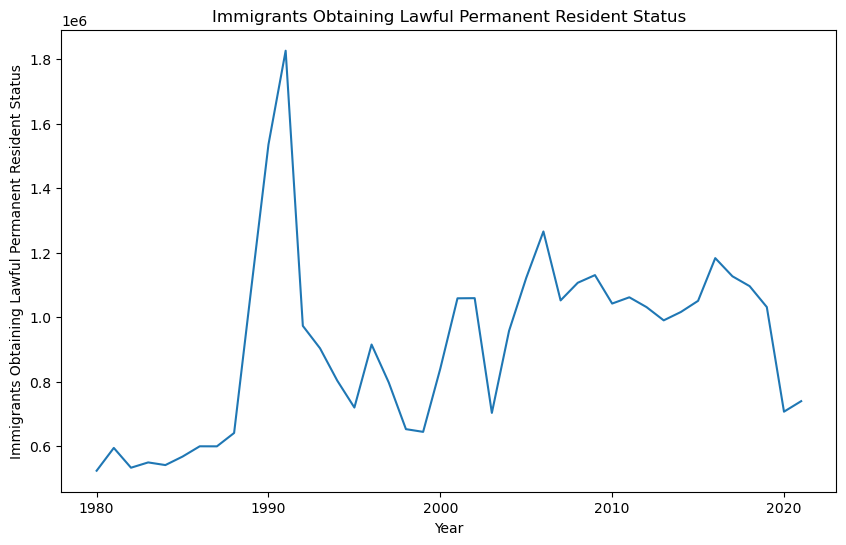

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Immigrants Obtaining Lawful Permanent Resident Status'])
plt.title('Immigrants Obtaining Lawful Permanent Resident Status', loc='center')
plt.xlabel('Year')
plt.ylabel('Immigrants Obtaining Lawful Permanent Resident Status')
plt.show()

* The amount of immigrants receiving lawful permanent resident status hit a peak in 1991, which seems to be outlier.
* Since then, the data constantly fluctuates.
* The change is relatively flat between the years of 2005 and 2019; however, there was a sharp drop in 2020, which occured the same time as the COVID-19 pandemic.

### Fit the model using Linear Regression

In [7]:
model = LinearRegression()
X = np.array(df['Year']).reshape(-1,1)
y = df['Refugee Arrivals']
model.fit(X, y)

LinearRegression()

### Plot the **Immigrants obtaining lawful permanent resident status data** with regression line

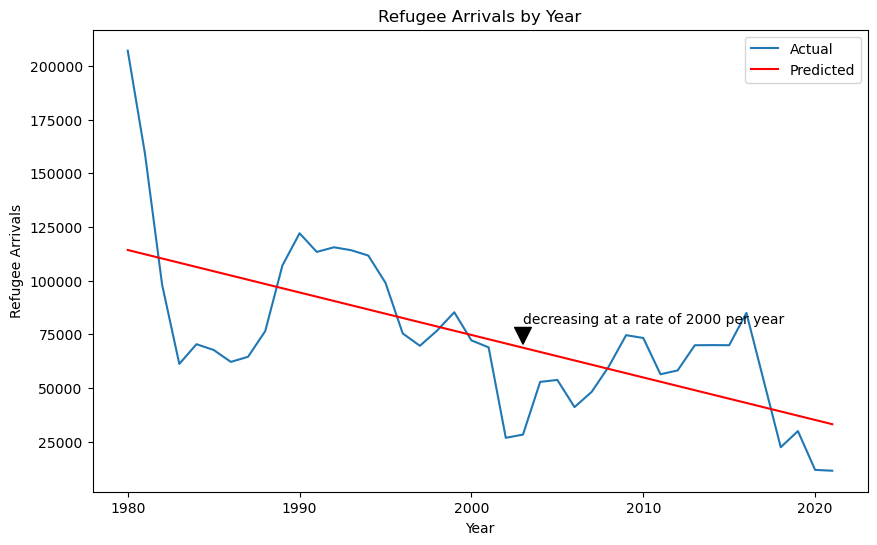

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], y, label='Actual')
plt.plot(df['Year'], model.predict(X), color='red', label='Predicted')

plt.title('Refugee Arrivals by Year', loc='center')
plt.xlabel('Year')
plt.ylabel('Refugee Arrivals')

plt.annotate('decreasing at a rate of 2000 per year', xy=(2003, 70000), xytext=(2003, 80000),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.legend()
plt.show()

### Plot removals, apprehensions, and returns over time

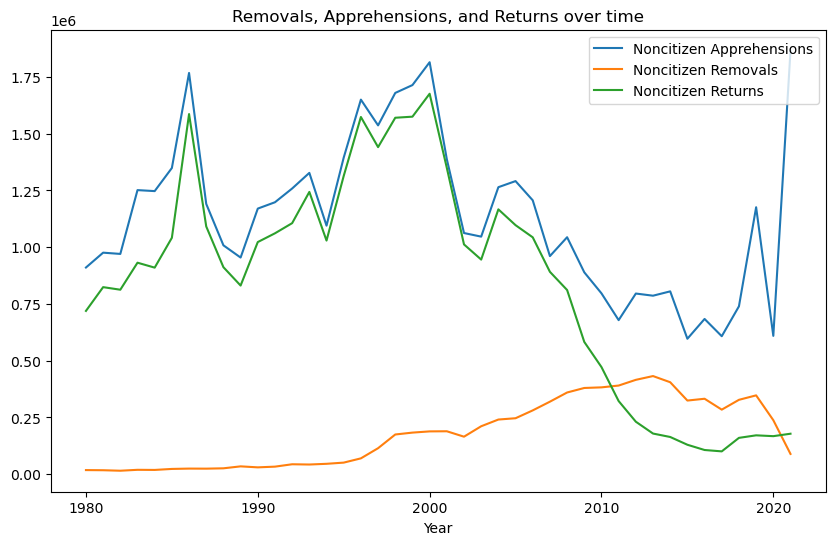

In [9]:
plt.figure(figsize=(10, 6))

plt.plot(df['Year'], df['Noncitizen Apprehensions'], label='Noncitizen Apprehensions')
plt.plot(df['Year'], df['Noncitizen Removals'], label='Noncitizen Removals')
plt.plot(df['Year'], df['Noncitizen Returns'], label='Noncitizen Returns')

plt.title('Removals, Apprehensions, and Returns over time', loc='center')
plt.xlabel('Year')

plt.legend()
plt.show()

1. The year 2020 saw a significant rise in Noncitizen apprehensions, potentially due to the inclusion of data related to the COVID-19 pandemic.
2. There was a notable decrease in Removals in 2020, which could be a consequence of the surge in apprehensions or a direct impact of the COVID-19 pandemic.
3. The data suggests a close correlation between the number of Apprehensions and Removals until around 2008, after which the number of returns declined. This trend might be indicative of the increase in border-security policies during the mid-2010s.
4. As the number of returns decreased, the number of removals increased, possibly compensating for the decline in returns.
5. The data suggests that the increase in removals started before the decline in returns.

In [10]:
df['Immigrants Increase Rate'] = df['Immigrants Obtaining Lawful Permanent Resident Status'].pct_change()

# Monthly Unemployment Rate

In [11]:
df_unemployment = pd.read_csv('./data/monthly-unemployment-rate.csv')
df_unemployment.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2014,6.6,6.7,6.7,6.2,6.3,6.1,6.2,6.1,5.9,5.7,5.8,5.6
1,2015,5.7,5.5,5.4,5.4,5.6,5.3,5.2,5.1,5.0,5.0,5.1,5.0
2,2016,4.8,4.9,5.0,5.1,4.8,4.9,4.8,4.9,5.0,4.9,4.7,4.7
3,2017,4.7,4.6,4.4,4.4,4.4,4.3,4.3,4.4,4.3,4.2,4.2,4.1
4,2018,4.0,4.1,4.0,4.0,3.8,4.0,3.8,3.8,3.7,3.8,3.8,3.9


## Calculate annual average unemployment rate

In [12]:
columns_to_include = df_unemployment.columns[2:]
average_unemployment_rate = df_unemployment[columns_to_include].mean(axis=1)
df_unemployment['Average'] = average_unemployment_rate

df_unemployment.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Average
0,2014,6.6,6.7,6.7,6.2,6.3,6.1,6.2,6.1,5.9,5.7,5.8,5.6,6.118182
1,2015,5.7,5.5,5.4,5.4,5.6,5.3,5.2,5.1,5.0,5.0,5.1,5.0,5.236364
2,2016,4.8,4.9,5.0,5.1,4.8,4.9,4.8,4.9,5.0,4.9,4.7,4.7,4.881818
3,2017,4.7,4.6,4.4,4.4,4.4,4.3,4.3,4.4,4.3,4.2,4.2,4.1,4.327273
4,2018,4.0,4.1,4.0,4.0,3.8,4.0,3.8,3.8,3.7,3.8,3.8,3.9,3.881818


## Plot the average unemployment rate

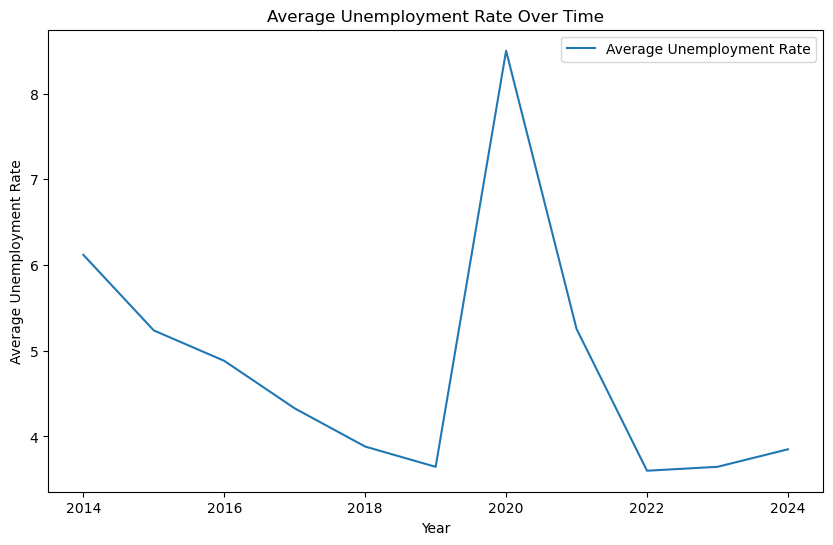

In [13]:
plt.figure(figsize=(10, 6))

plt.plot(df_unemployment['Year'], df_unemployment['Average'], label='Average Unemployment Rate')

plt.title('Average Unemployment Rate Over Time', loc='center')
plt.xlabel('Year')
plt.ylabel('Average Unemployment Rate')

# Show legend
plt.legend()

# Show the plot
plt.show()

In [14]:
# Merge the two dataframes on the 'Year' column
df_merged = pd.merge(df, df_unemployment[['Year', 'Average']], on='Year')

# Print the merged dataframe
df_merged.head()

,Year,Immigrants Obtaining Lawful Permanent Resident Status,Refugee Arrivals,Noncitizen Apprehensions,Noncitizen Removals,Noncitizen Returns,Immigrants Increase Rate,Average
0,2014,1016518,69975,805334,405026,163836,0.026213,6.118182
1,2015,1051031,69920,596560,324303,129636,0.033952,5.236364
2,2016,1183505,84989,683782,332263,106479,0.126042,4.881818
3,2017,1127167,53691,607677,284298,100454,-0.047603,4.327273
4,2018,1096611,22405,739486,327554,159960,-0.027109,3.881818


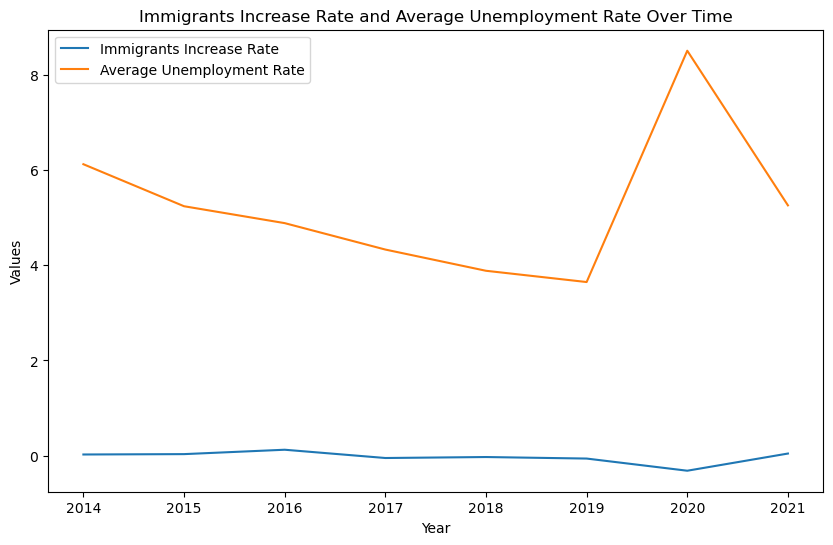

In [15]:
plt.figure(figsize=(10, 6))

# Plot the 'Immigrants Increase Rate'
plt.plot(df_merged['Year'], df_merged['Immigrants Increase Rate'], label='Immigrants Increase Rate')

# Plot the 'Average Unemployment Rate'
plt.plot(df_merged['Year'], df_merged['Average'], label='Average Unemployment Rate')

# Add title and labels
plt.title('Immigrants Increase Rate and Average Unemployment Rate Over Time', loc='center')
plt.xlabel('Year')
plt.ylabel('Values')

# Show legend
plt.legend()

# Show the plot
plt.show()

Function for 'Immigrants Increase Rate': y = -0.025444707788126356 * x + 51.30770921415226
Metrics for 'Immigrants Increase Rate':
MAE: 0.07391932237014066
MSE: 0.011523884379319484
RMSE: 0.10734935667864752

Function for 'Average Unemployment Rate': y = 0.07283549783549778 * x + -141.71493506493496
Metrics for 'Average Unemployment Rate':
MAE: 1.1043560606060567
MSE: 2.0655151761117576
RMSE: 1.4371900278361793


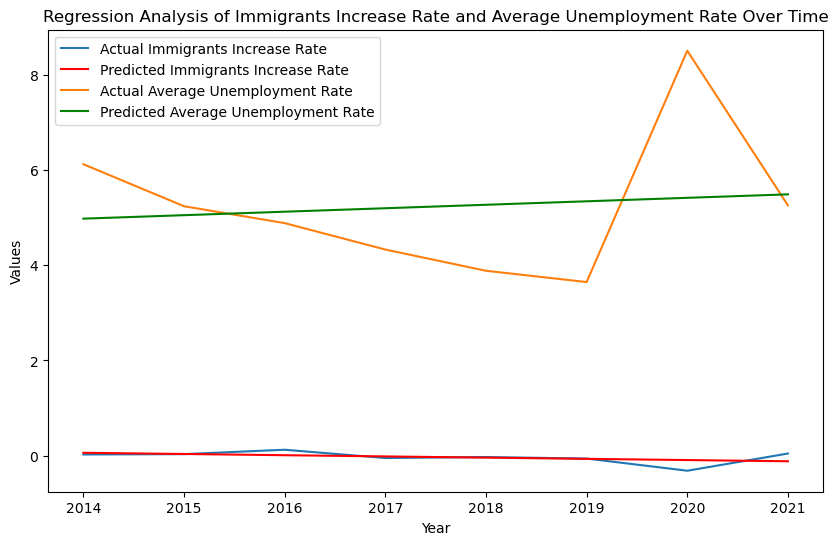

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Create a LinearRegression object
model = LinearRegression()

# Reshape the 'Year' column to be a 2D array
X = df_merged['Year'].values.reshape(-1,1)

# Fit the model for 'Immigrants Increase Rate'
y1 = df_merged['Immigrants Increase Rate']
model.fit(X, y1)
y1_pred = model.predict(X)

slope1 = model.coef_[0]
intercept1 = model.intercept_
print(f"Function for 'Immigrants Increase Rate': y = {slope1} * x + {intercept1}")

mae1 = mean_absolute_error(y1, y1_pred)
mse1 = mean_squared_error(y1, y1_pred)
rmse1 = np.sqrt(mse1)
print(f"Metrics for 'Immigrants Increase Rate':\nMAE: {mae1}\nMSE: {mse1}\nRMSE: {rmse1}")

print()

# Fit the model for 'Average Unemployment Rate'
y2 = df_merged['Average']
model.fit(X, y2)
y2_pred = model.predict(X)

slope2 = model.coef_[0]
intercept2 = model.intercept_
print(f"Function for 'Average Unemployment Rate': y = {slope2} * x + {intercept2}")

mae2 = mean_absolute_error(y2, y2_pred)
mse2 = mean_squared_error(y2, y2_pred)
rmse2 = np.sqrt(mse2)
print(f"Metrics for 'Average Unemployment Rate':\nMAE: {mae2}\nMSE: {mse2}\nRMSE: {rmse2}")

# Plot the actual data and the regression line for 'Immigrants Increase Rate'
plt.figure(figsize=(10, 6))
plt.plot(df_merged['Year'], y1, label='Actual Immigrants Increase Rate')
plt.plot(df_merged['Year'], y1_pred, color='red', label='Predicted Immigrants Increase Rate')

# Plot the actual data and the regression line for 'Average Unemployment Rate'
plt.plot(df_merged['Year'], y2, label='Actual Average Unemployment Rate')
plt.plot(df_merged['Year'], y2_pred, color='green', label='Predicted Average Unemployment Rate')

# Add title and labels
plt.title('Regression Analysis of Immigrants Increase Rate and Average Unemployment Rate Over Time', loc='center')
plt.xlabel('Year')
plt.ylabel('Values')

# Show legend
plt.legend()

# Show the plot
plt.show()

- The function for 'Immigrants Increase Rate' shows a negative slope (-0.0254), indicating a decreasing trend in the rate of increase of immigrants obtaining lawful permanent resident status from 2014 to 2021. This could be due to various factors such as changes in immigration policies, economic conditions, or global events like the COVID-19 pandemic.

- The function for 'Average Unemployment Rate' has a positive slope (0.0728), suggesting an increasing trend in the average unemployment rate over the same period. This could be attributed to various factors such as economic downturns, changes in industry demands, or again, global events like the COVID-19 pandemic.

- The trends in both 'Immigrants Increase Rate' and 'Average Unemployment Rate' could potentially be related. For instance, a higher unemployment rate might discourage immigration, leading to a decrease in the rate of increase of immigrants. Conversely, a lower unemployment rate might encourage immigration, leading to an increase in the rate of increase of immigrants.

- The Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) for 'Immigrants Increase Rate' are relatively low, indicating that the model's predictions are fairly accurate for this variable.

- The MAE, MSE, and RMSE for 'Average Unemployment Rate' are higher than those for 'Immigrants Increase Rate', suggesting that the model's predictions for 'Average Unemployment Rate' are less accurate. This could be due to less correlation between the 'Year' and 'Average Unemployment Rate' variables.

Function for 'Average Unemployment Rate': y = -7.321196078151464 * x + 5.033091899295232
Metrics for 'Average Unemployment Rate':
MAE: 1.0561579009306816
MSE: 1.2934998978824994
RMSE: 1.1373213696587694


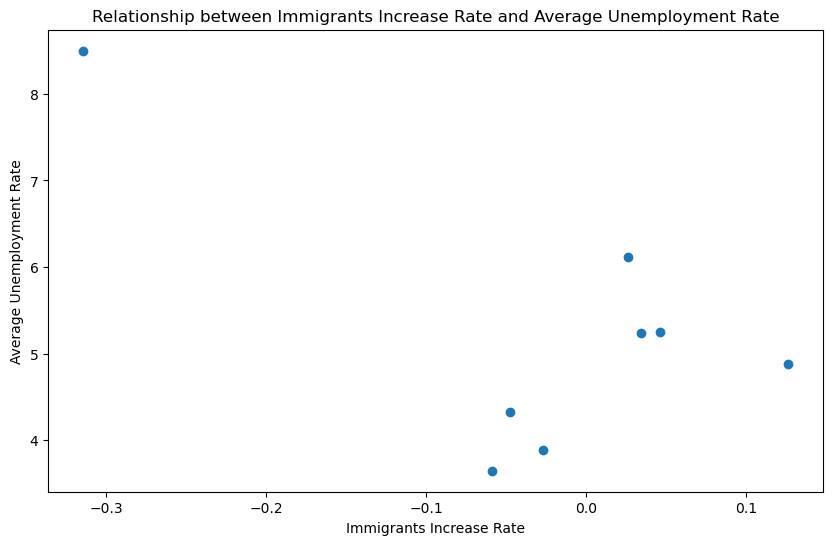

In [21]:
# Create a LinearRegression object
model = LinearRegression()

# Reshape the 'Immigrants Increase Rate' column to be a 2D array
X = df_merged['Immigrants Increase Rate'].values.reshape(-1,1)

# Fit the model for 'Average Unemployment Rate'
y = df_merged['Average']
model.fit(X, y)
y_pred = model.predict(X)

slope = model.coef_[0]
intercept = model.intercept_
print(f"Function for 'Average Unemployment Rate': y = {slope} * x + {intercept}")

mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
print(f"Metrics for 'Average Unemployment Rate':\nMAE: {mae}\nMSE: {mse}\nRMSE: {rmse}")

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_merged['Immigrants Increase Rate'], df_merged['Average'])

# Add title and labels
plt.title('Relationship between Immigrants Increase Rate and Average Unemployment Rate')
plt.xlabel('Immigrants Increase Rate')
plt.ylabel('Average Unemployment Rate')

# Show the plot
plt.show()

The negative slope (-7.321196078151464) suggests that there is an inverse relationship between the 'Immigrants Increase Rate' and the 'Average Unemployment Rate'. 

In other words, as the 'Immigrants Increase Rate' increases, the 'Average Unemployment Rate' decreases, and vice versa. This could indicate that an increase in immigration rate might be associated with a decrease in unemployment rate, or vice versa. However, correlation does not imply causation, and there could be other factors at play influencing both variables.